# Using PCA and MLP classifier for classification of IRIS data set

## IRIS data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


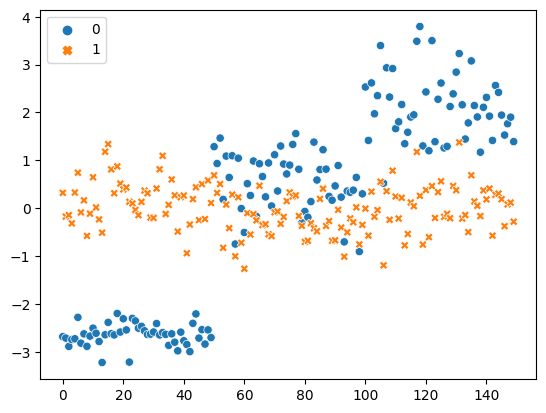

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

# load iris data set, ref: https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = datasets.load_iris()
X = iris.data
y = iris.target

# PCA
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = decomposition.PCA(n_components=2, svd_solver='full')
pca.fit(X)
# project pca onto original data
X = pca.transform(X)

# plot pca
plt.cla()
sns.scatterplot(X)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# PCA 
nof_prin_components = 2 
pca = decomposition.PCA(n_components=nof_prin_components, svd_solver='full').fit(X_train)

# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

In [46]:
print(len(X_train_pca))
print(X_train_pca[:5])

120
[[-3.03505187 -0.45530238]
 [-0.1263981  -0.67642668]
 [-2.84039596 -0.18890997]
 [ 1.71497667  0.07198395]
 [ 2.4841475  -0.05669595]]


In [47]:
print(len(X_test_pca))
print(X_test_pca[:5])

30
[[-2.63994161  0.26610832]
 [ 1.8972326   0.17615933]
 [ 0.60728757 -0.3613925 ]
 [ 1.61429263  0.22972903]
 [ 2.26536829 -0.22773006]]


In [41]:
# create neural network structure
nohn = 50 # nof hidden neurons
print("Fitting the classifier to the training set")

# ref: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='sgd', activation='tanh', batch_size=8, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 0.72820055
Validation score: 0.750000
Iteration 2, loss = 0.63517868
Validation score: 0.750000
Iteration 3, loss = 0.56797020
Validation score: 0.833333
Iteration 4, loss = 0.52168881
Validation score: 0.833333
Iteration 5, loss = 0.49116210
Validation score: 0.833333
Iteration 6, loss = 0.46608526
Validation score: 0.833333
Iteration 7, loss = 0.44607404
Validation score: 0.833333
Iteration 8, loss = 0.42896261
Validation score: 0.833333
Iteration 9, loss = 0.41379616
Validation score: 0.833333
Iteration 10, loss = 0.40131324
Validation score: 0.833333
Iteration 11, loss = 0.38862701
Validation score: 0.833333
Iteration 12, loss = 0.37810336
Validation score: 0.833333
Iteration 13, loss = 0.36807635
Validation score: 0.833333
Iteration 14, loss = 0.35932085
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [55]:
y_pred = clf.predict(X_test_pca) # reoognises the test data 
print(len(X_test), len(y_pred))

30 30


In [54]:
print(X_test[:2])
print(y_pred[:2])

[[5.1 3.4 1.5 0.2]
 [6.7 3.  5.2 2.3]]
[0 2]


In [65]:
target_names = ['setosa', 'versicolor', 'virginica']

def classify(sample_data):
    X_test_pca = pca.transform(sample_data)
    y_pred = clf.predict(X_test_pca)
    return target_names[y_pred[0]]

# sepal length, sepal width, petal length, petal width
prediction = classify([[6.7, 3.0,  5.2, 2.3]])
print(prediction)
    

virginica


In [51]:
# the recognition accuracy
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.10      0.18        10
           2       0.47      1.00      0.64         8

    accuracy                           0.70        30
   macro avg       0.82      0.70      0.61        30
weighted avg       0.86      0.70      0.63        30

